# Load the Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'titanic.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Data Preprocessing

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data = data.drop(columns=['Cabin','PassengerId','Name','Ticket'], axis=1)

In [7]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
data.shape


(891, 8)

In [11]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
data.shape

(891, 8)

In [14]:
data['Embarked']=data['Embarked'].fillna(data['Age'].mode()[0])

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
data = pd.get_dummies(data, columns=['Sex','Embarked'],drop_first=True)

In [20]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


C:\Users\rites\AppData\Local\Temp\ipykernel_23660\1267282709.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


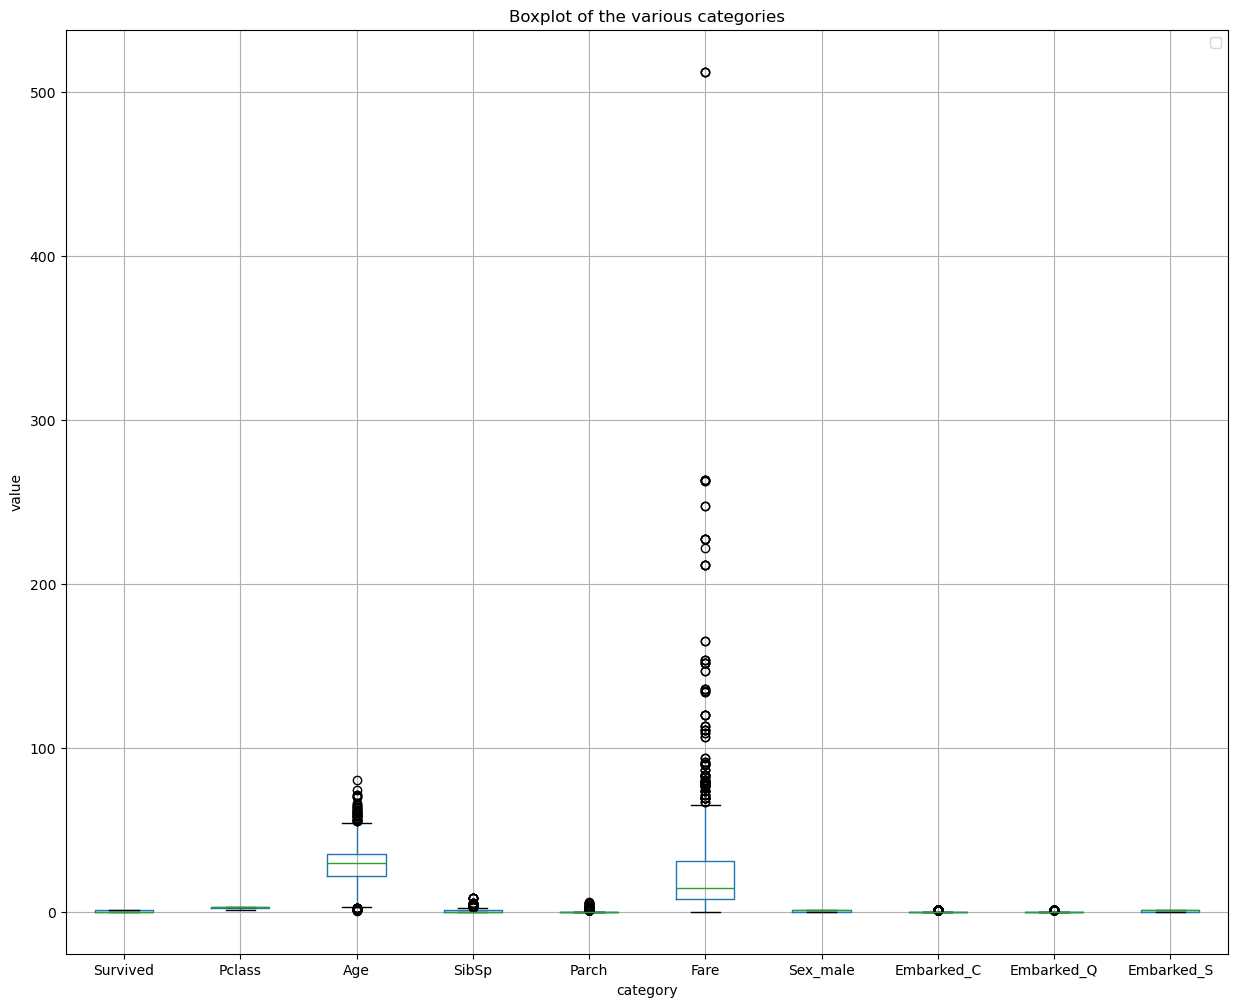

In [22]:
# Data representationa and visualization 
# Check the outliers
plt.figure(figsize=(15,12))
data.boxplot()

plt.xlabel('category')
plt.ylabel('value')
plt.title('Boxplot of the various categories')
plt.legend()
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_23660\3933026860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data['Age'],palette='Set2')


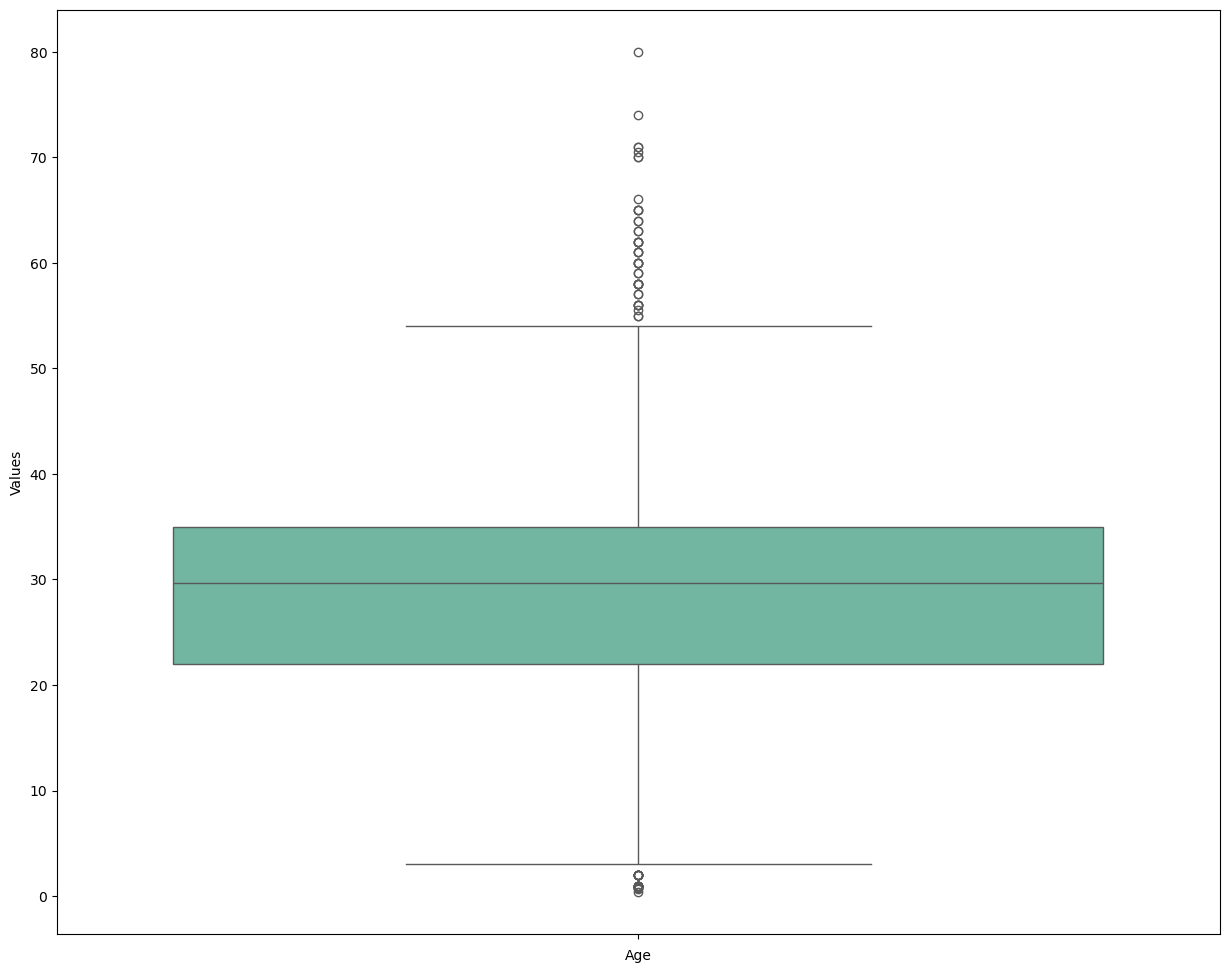

In [23]:

import seaborn as sns
plt.figure(figsize=(15,12))
sns.boxplot(data=data['Age'],palette='Set2')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

<Axes: >

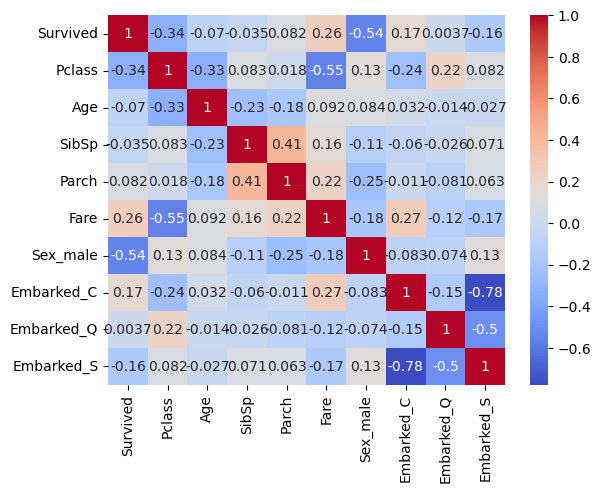

In [24]:
# check with the heatmap

corr_heatmap =  data.corr()
sns.heatmap(corr_heatmap,annot=True,cmap='coolwarm')

In [25]:
# Impute the Outliers

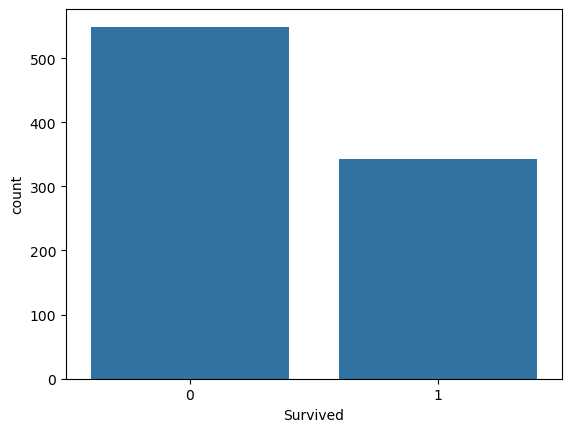

In [26]:
sns.countplot(data,x='Survived')
plt.show()

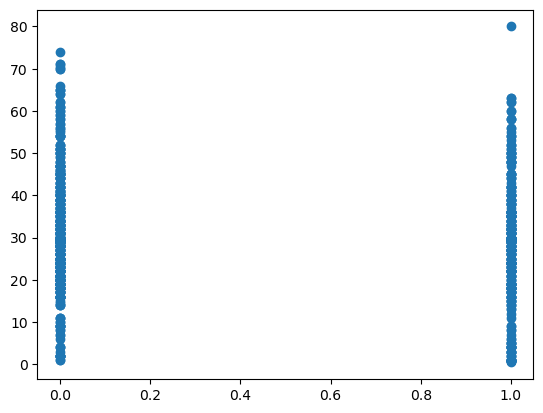

In [27]:
plt.scatter(data['Survived'],data['Age'])
plt.show()

# Split the Data

In [28]:
X = data.drop('Survived',axis=1)

In [29]:
y = data['Survived']

# Split the Dataset into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape, y_train.shape

((712, 9), (712,))

In [33]:
X_test.shape,y_test.shape

((179, 9), (179,))

In [34]:
# feature scaling


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()


In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_test_scaled = scaler.transform(X_test)

# Define Individual Base Models

In [39]:
# Define individual classification models for Random Forest, Decision Tree, XGBoost (XGB), and LightGBM (LGBM).

In [40]:
# Random Forrest 

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_rf = RandomForestClassifier(n_estimators=125,criterion='gini', oob_score=True)

In [43]:
# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_dt = DecisionTreeClassifier(random_state = 42)

In [46]:
# XGBoost (XGB)

In [47]:
import xgboost as xgb

In [48]:
model_xgb = xgb.XGBClassifier()

In [49]:
# LightGBM (LGBM)

In [50]:
!pip install lightgbm

In [51]:
import lightgbm as lgb

In [52]:
model_lgb = lgb.LGBMClassifier()

# Train the Individual Models

In [53]:
# Random Forrest 

In [54]:
model_rf.fit(X_train_scaled,y_train) 

RandomForestClassifier(n_estimators=125, oob_score=True)

In [55]:
# Decision Tree

In [56]:
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# XGBoost (XGB)

In [58]:
model_xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
# LightGBM (LGBM)

In [60]:
model_lgb.fit(X_train_scaled,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

# Predictions

In [61]:
# Make predictions on the test dataset using all the individual models and ensemble models.

In [62]:
# Random Forrest 

In [63]:
model_rf_pred = model_rf.predict(X_test_scaled)

In [64]:
# Decision Tree

In [65]:
model_dt_pred = model_dt.predict(X_test_scaled)

In [66]:
# XGBoost (XGB)

In [67]:
model_xgb_pred = model_xgb.predict(X_test_scaled)

In [68]:
# LightGBM (LGBM)

In [69]:
model_lgb_pred = model_lgb.predict(X_test_scaled)

C:\Users\rites\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Evaluate the Models

In [70]:
# Evaluate the models’ performance using appropriate evaluation metrics

In [71]:
# Random Forrest 

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
acc_score = accuracy_score(y_test,model_rf_pred)
print(f'Accuracy:{acc_score :.2f}')

Accuracy:0.81


In [74]:
model_rf.oob_score_*100

78.65168539325843

In [75]:
print('Confusion Matrix:')
conf_mtx=confusion_matrix(y_test,model_rf_pred)
print(conf_mtx)

Confusion Matrix:
[[90 15]
 [19 55]]


In [76]:
print('Classification Report')
class_rpt= classification_report(y_test,model_rf_pred)
print(class_rpt)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [77]:
# Decision Tree

In [78]:
acc_score = accuracy_score(y_test,model_dt_pred)
print(f'Accuracy:{acc_score :.2f}')

Accuracy:0.78


In [79]:
print('Confusion Matrix:')
conf_mtx=confusion_matrix(y_test,model_dt_pred)
print(conf_mtx)

Confusion Matrix:
[[82 23]
 [17 57]]


In [80]:
print('Classification Report')
class_rpt= classification_report(y_test,model_dt_pred)
print(class_rpt)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [81]:
# XGBoost (XGB) 

In [101]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
xgb_rmse = np.sqrt(mean_squared_error(y_test, model_xgb_pred))
print(f'XGBoost RMSE: {xgb_rmse}')
xgb_r2 = r2_score(y_test, model_xgb_pred)
print(f"XGBoost R-squared: {xgb_r2}")
acc_score=accuracy_score(y_test,model_xgb_pred)
print(acc_score)


XGBoost RMSE: 0.4484610556511615
XGBoost R-squared: 0.17065637065637063
0.7988826815642458


In [83]:
# LightGBM (LGBM)

In [84]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, model_lgb_pred))
print(f'XGBoost RMSE: {lgb_rmse}')
lgb_r2 = r2_score(y_test, model_lgb_pred)
print(f"XGBoost R-squared: {lgb_r2}")

XGBoost RMSE: 0.422813138065352
XGBoost R-squared: 0.26280566280566275


In [85]:
# Ensemble stacking

In [86]:
estimators = [
    ('model_rf', RandomForestClassifier()),
    ('model_dt', DecisionTreeClassifier()),
]



In [87]:
final_estimator = RandomForestClassifier()

In [88]:
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=False,  # set True if you want to include original features too
    cv=5  # cross-validation folds for training meta-model
)

In [89]:
stack_model.fit(X_train_scaled, y_train)
y_pred = stack_model.predict(X_test_scaled)

In [90]:
acc_score = accuracy_score(y_test,y_pred)

In [91]:
print(acc_score)

0.7653631284916201


In [92]:
# voting classifier

In [95]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('xgb', model_xgb), ('lgbm', model_lgb)],
    voting='soft'  # use 'hard' for majority voting
)

In [96]:
voting_clf.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm', LGBMClassifier())],
                 voting='soft')

In [97]:
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_voting))

Accuracy: 0.8268156424581006


C:\Users\rites\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
